In [17]:
import os
os.chdir(r'C:\Users\MAIN\Desktop\Most Important Exercises\Completed projs for GitHub Report\BusinessCase_Data')
os.getcwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.interactive(False)

## Exploratory Data Analysis


### Question1 - What branch has the most number of customers?

In [18]:
#import dataset
df = pd.read_csv('BusinessCase_Accts.csv')
df.head(n=5)
df.describe()
df.shape
#group branches by branch number and take count of customers by customer id,
m = df.groupby(['branchNumber',])['cust_id'].count()
m.head(5)
#convert the resulting numpy series back to a dataframe
df = pd.DataFrame({'branchNumber':m.index, 'NumberofCust':m.values})
df.head(5)
#sort the reulting dataframe by number of customers 
df.sort_values(by=['NumberofCust'], inplace=True, ascending=False)
df.head(5)
#subset the top value of BranchNumber as the branch with the highest number of customers
print(df.iloc[0,0])
#(Answer = Branch 1029 with 302 customers)

1029


### Question2 - How old is oldest customer as of 2019-07-01

In [19]:
import datetime
#import data
df = pd.read_csv('BusinessCase_Custs.csv')
#convert date of birth column to datetime
df['birthDate'] = pd.to_datetime(df['birthDate'])
#define the end date 2019-07-01 and format to date format
edate = '172019'
end_date = datetime.datetime.strptime(edate, '%m%d%Y')
#assign end date to a column
df['Enddate'] = end_date
df.head()
#get a new column Age, with the difference between the birthdate and end date in years
df['Age'] = df['Enddate'] - df['birthDate']
df['Age']=df['Age']/np.timedelta64(1,'Y')
df.head(n=5)
#sort the dataframe by the age column and select the topage as the age of the oldest customer
df.sort_values(by=['Age'], inplace=True, ascending=False)
df.iloc[0,14]

106.21162652210518

### Question3 - How many accounts does the oldest customer have?
for the oldest customer, df['id'] = fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-5e56-4d8a-9888-560f2cde4938.
the id was obtained from the previous calculation of the customer age

In [20]:

data1 = pd.read_csv('BusinessCase_Accts.csv')
data1.head(n=5)
list(data1.columns)
#where data from dataset where the cust_id is equal to the cust_id of the oldest customer
df7 = data1[data1['cust_id'] == 'fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-5e56-4d8a-9888-560f2cde4938'].head(5)
df7
#find the unique number of account numbers that belongs the cust_id
NumAccount = df7['id'].nunique()
NumAccount

2

### Question4 - How many transactions went to Starbucks in April?

In [21]:
#import data
df = pd.read_csv('BusinessCase_Tx.csv')
#convert transaction date column to datetime
df['originationDateTime'] = pd.to_datetime(df['originationDateTime'])
#create a new column with only the month of the transaction date
df['month_of_date'] = df['originationDateTime'].dt.month
df.head(n=5)
#subset required columns of the dataset
df5 = df[['description', 'currencyAmount', 'originationDateTime', 'month_of_date','categoryTags']]
df5.head(n=5)
#select data where description has Starbucks in the month of April
df6 = df5[(df5['description'].str.match('STARBUCKS')) & (df5['month_of_date'] == 4)]
df6.head(n=5)
#count number of transaction description with starbucks
tx = df6['description'].count()
print(tx)

395


### Question5 - How much was spent on Starbucks in April?

In [22]:
#import data
df = pd.read_csv('BusinessCase_Tx.csv')
#convert transaction date column to datetime
df['originationDateTime'] = pd.to_datetime(df['originationDateTime'])
#create a new column with only the month of the transaction date
df['month_of_date'] = df['originationDateTime'].dt.month
df.head(n=5)
#subset required columns of the dataset
df5 = df[['description', 'currencyAmount', 'originationDateTime', 'month_of_date','categoryTags']]
df5.head(n=5)
#select data where description has Starbucks in the month of April
df6 = df5[(df5['description'].str.match('STARBUCKS')) & (df5['month_of_date'] == 4)]
#Calculate Amt spent on Starbucks for the month of April
Amt = df6['currencyAmount'].sum()
print(Amt)

1720.87


### Question6 - Hypothesis Testing: Is the average spend at Starbucks(statistically)significantly different in April compared to June?

In [23]:
import scipy.stats as stats
#Calculate avg spend at starbucks in April
Aprilspend = df6['currencyAmount']
Aprilmean = df6['currencyAmount'].mean()
print(Aprilmean) # = 4.36
#Calculate avg spend at starbucks in June
df6 = df5[(df5['description'].str.match('STARBUCKS')) & (df5['month_of_date'] == 6)]
df6.head(n=5)
Junespend = df6['currencyAmount']
Junemean = df6['currencyAmount'].mean()
print(Junemean) # = 4.50
#Check the statstical significance of the two means - hypothesis testing
#Null hypothesis: The means of the average april spend and average june spend are the same.
stats.ttest_ind(a= Aprilspend,
                b= Junespend,
                equal_var=False)


4.356632911392409
4.4984334203655365


Ttest_indResult(statistic=-1.008555214726324, pvalue=0.3135027717110388)

Ttest_indResult(statistic=-1.008555214726324, pvalue=0.3135027717110388). we used a two-tailed t-test since the two means are sample means. 
The test yields a p-value of 0.3135, which means there is a 33% chance we will see sample data this far apart if the two groups tested are actually identical.
we using a 95% confidence level. We would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

### Question7 - Which date exhibited the highest average spend above trend at Starbucks(based on a 10-period moving average, ignoring missing dates)?

In [24]:
#import data
df = pd.read_csv('BusinessCase_Tx.csv')
#convert to datetime and match transactions with the starbucks description
df['originationDateTime'] = pd.to_datetime(df['originationDateTime'])
df2 = df[df['description'].str.match('STARBUCKS')]
#select desired columns from dataset
df3 = df2[['description','originationDateTime', 'currencyAmount']]
df3.head(n=5)
#calculate rolling mean on the currency amount and store values in a new column
df3['MA_10'] = df3['currencyAmount'].rolling(window=10).mean()
df3.head(n=15)
#sort values of rolling mean
df3.sort_values(by=['MA_10'], inplace=True, ascending=False)
df3.head(n=5)
#select the top value of date column in the dataset as the date with the highest average
print(df3.iloc[0,1])

2018-06-28 07:33:00+00:00


C:\Users\MAIN\AnacondaProjects\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\MAIN\AnacondaProjects\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


date with that exhibited the highest average spend above trend at Starbucks (based on a 10-period moving average, ignoring missing dates) is 2018-06-28 07:33:00+00:00.

### Customer Segmentation

## CLUSTER ANALYSIS FOR CUSTOMER ORDERS

In [25]:
#import data
df1 = pd.read_csv('BusinessCase_Custs.csv')

list(df1.columns) 
df1.head(n=5)
#check missing values
df1.isnull().sum()
df2 = df1[['totalIncome','relationshipStatus','type', 'gender', 'birthDate', 'workActivity','occupationIndustry', 'habitationStatus']]
df2.isnull().sum()
#check values in column and fill missing values
df2['workActivity'].value_counts(dropna=False)
df2['workActivity'].fillna(value='parttime', inplace=True)
df2['occupationIndustry'].value_counts(dropna=False)
df2['occupationIndustry'].fillna(value='6111 Elementary and secondary schools', inplace=True)
df2['habitationStatus'].value_counts(dropna=False)
df2['habitationStatus'].fillna(value='Group', inplace=True)
df2.isnull().sum()
df2.head(n=5)
#check vlaues in a column and encode categorical variables
df2['gender'].value_counts(dropna=False)
df2['relationshipStatus'].value_counts(dropna=False)
df2['type'].value_counts(dropna=False)
df2.habitationStatus = df2.habitationStatus.map({'With Spouse':0,'With Parent':1,'Group':2})
df2.workActivity = df2.workActivity.map({'fulltime':0,'parttime':1})
df2.gender = df2.gender.map({'Female':0,'Male':1,'Other':2})
df2.relationshipStatus = df2.relationshipStatus.map({'Married':0,'Single':1,'Divorced':2,'Widowed':3,'Separated':4})
df2.type = df2.type.map({'Personal':1})
df2.head(n=5)

C:\Users\MAIN\AnacondaProjects\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\MAIN\AnacondaProjects\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,totalIncome,relationshipStatus,type,gender,birthDate,workActivity,occupationIndustry,habitationStatus
0,0.0,1,1,1,12/26/1985,1,6111 Elementary and secondary schools,2
1,40009.2,0,1,0,1/30/1977,0,5221 Depository credit intermediation,0
2,0.0,1,1,0,11/22/2003,1,6111 Elementary and secondary schools,1
3,44709.0,0,1,2,5/7/1983,0,"5412 Accounting, tax preparation, bookkeeping ...",0
4,21496.0,1,1,1,1/29/1983,0,4855 Charter bus industry,1


No handles with labels found to put in legend.


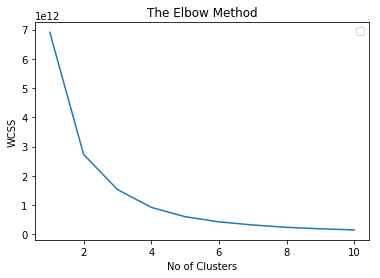

In [26]:
#select columns not needed for clustering
X = df2.drop(['occupationIndustry', 'birthDate'], axis=1).values
type(X)
#export file to external source
export_X2 = df2.to_csv (r'C:\Users\MAIN\Desktop\Most Important Exercises\Completed projs for GitHub Report\BusinessCase_Data\X2.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#import clustering algorithm
from sklearn.cluster import KMeans
#code to obtain the desired number of clusters
wcss = []
#The Elbow method. Used to find out the optimal no of clusters for the WCSS by running over a range of instances.
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)  

plt.plot(range(1,11), wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.legend()  #we chose 5 clusters after observing that the WCSS troughs around that region 
plt.show()
#model data 
model =  KMeans(n_clusters=5) #use model with approved number of clusters
model.fit(X)
model.inertia_ # do a for a loop for the inertia to get the inertia
#predict data
y_pred = model.predict(X)

The elbow method produced an optimal inflection point at 5. That means we will try to create five different clusters for the customers.

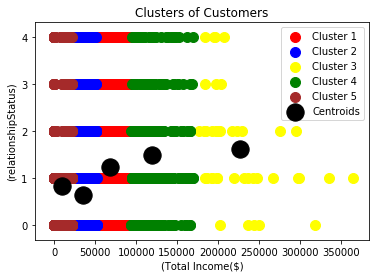

In [27]:
#visualising the clusters for two-dimensional datapoints
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1], s=100, c='yellow', label = 'Cluster 3')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1], s=100, c='green', label = 'Cluster 4')
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1], s=100, c='brown', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 300, c = 'black', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('(Total Income($)')
plt.ylabel('(relationshipStatus)')
plt.legend()
plt.show()